In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

from matplotlib.ticker import ScalarFormatter

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
sns.set_theme('notebook')

In [3]:
df = pd.read_csv('data/tmmm-ytt6.csv')

In [4]:
df.head(3)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]


In [5]:
df.shape

(5000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   usageclass       5000 non-null   object 
 1   checkouttype     5000 non-null   object 
 2   materialtype     5000 non-null   object 
 3   checkoutyear     5000 non-null   int64  
 4   checkoutmonth    5000 non-null   int64  
 5   checkouts        5000 non-null   int64  
 6   title            5000 non-null   object 
 7   isbn             0 non-null      float64
 8   creator          4269 non-null   object 
 9   subjects         4601 non-null   object 
 10  publisher        4624 non-null   object 
 11  publicationyear  4426 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 468.9+ KB


In [7]:
df.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'isbn', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [8]:
df['publicationyear']

0         2017
1          NaN
2       [2015]
3         2009
4         2015
         ...  
4995      2013
4996      2017
4997    c2015.
4998    [2016]
4999    [2016]
Name: publicationyear, Length: 5000, dtype: object

In [9]:
df['publicationyear_clean'] = df['publicationyear'].str.replace(r'\D', '', regex=True)

In [10]:
df = df.dropna(subset=['publicationyear_clean'])

In [11]:
df['publicationyear_clean'] = df['publicationyear_clean'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4426 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   usageclass             4426 non-null   object 
 1   checkouttype           4426 non-null   object 
 2   materialtype           4426 non-null   object 
 3   checkoutyear           4426 non-null   int64  
 4   checkoutmonth          4426 non-null   int64  
 5   checkouts              4426 non-null   int64  
 6   title                  4426 non-null   object 
 7   isbn                   0 non-null      float64
 8   creator                3902 non-null   object 
 9   subjects               4401 non-null   object 
 10  publisher              4425 non-null   object 
 11  publicationyear        4426 non-null   object 
 12  publicationyear_clean  4426 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 484.1+ KB


In [13]:
df['usageclass'].unique()

array(['Digital', 'Physical'], dtype=object)

In [14]:
df['checkouttype'].unique()

array(['OverDrive', 'Horizon'], dtype=object)

In [15]:
df['materialtype'].unique()

array(['EBOOK', 'SOUNDDISC', 'BOOK', 'AUDIOBOOK', 'VIDEODISC', 'MUSIC',
       'SOUNDREC', 'SOUNDDISC, VIDEODISC', 'CR', 'LARGEPRINT',
       'ER, SOUNDDISC', 'ATLAS', 'ER', 'MAP', 'VIDEOCASS, VIDEODISC',
       'REGPRINT', 'VIDEO'], dtype=object)

In [16]:
df['materialtype'].value_counts()

materialtype
BOOK                    2116
EBOOK                   1022
SOUNDDISC                449
AUDIOBOOK                432
VIDEODISC                370
MUSIC                     12
SOUNDREC                   5
SOUNDDISC, VIDEODISC       5
CR                         4
ER, SOUNDDISC              2
MAP                        2
VIDEO                      2
LARGEPRINT                 1
ATLAS                      1
ER                         1
VIDEOCASS, VIDEODISC       1
REGPRINT                   1
Name: count, dtype: int64

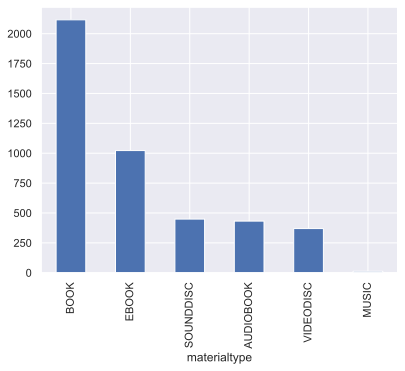

In [17]:
mtype_counts = df['materialtype'].value_counts()
mtype_counts[mtype_counts > 5].plot.bar();

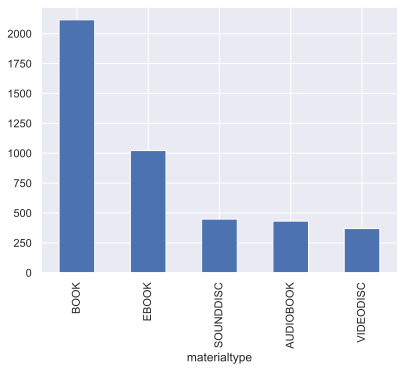

In [18]:
df['materialtype'].value_counts()[:5].plot.bar();

In [19]:
df.head(3)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear,publicationyear_clean
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017,2017
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015],2015
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009,2009


In [20]:
df.groupby('materialtype')['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype
BOOK                    6381
EBOOK                   3057
VIDEODISC               2611
AUDIOBOOK               1606
SOUNDDISC               1077
SOUNDREC                  42
SOUNDDISC, VIDEODISC      14
MUSIC                     14
CR                        10
VIDEO                      3
Name: checkouts, dtype: int64

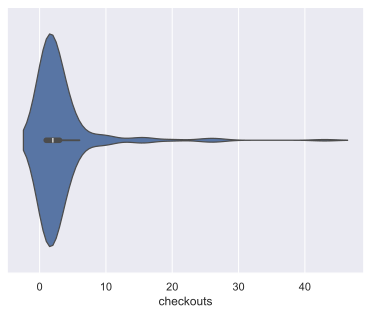

In [21]:
sns.violinplot(data=df['checkouts'].sample(200),
               orient='h');

In [22]:
# Plot usageclass and materialtype

In [23]:
df.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'isbn', 'creator', 'subjects',
       'publisher', 'publicationyear', 'publicationyear_clean'],
      dtype='object')

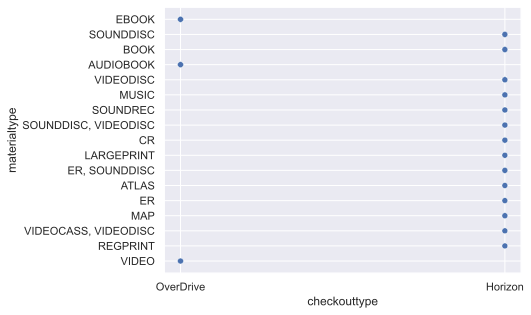

In [24]:
sns.scatterplot(x=df['checkouttype'],
                y=df['materialtype']);

In [25]:
df.head(2)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear,publicationyear_clean
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017,2017
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015],2015


<Axes: xlabel='checkouts', ylabel='Count'>

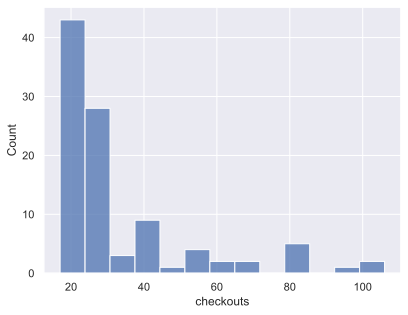

In [26]:
top100 = df.sort_values(by='checkouts', ascending=False).head(100)
sns.histplot(data=top100,
             x='checkouts')

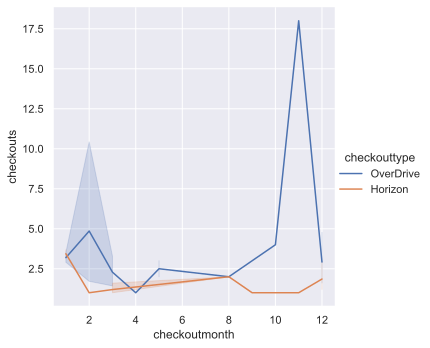

In [27]:
sns.relplot(data=df,
            x='checkoutmonth',
            y='checkouts',
            hue='checkouttype',
            kind='line');

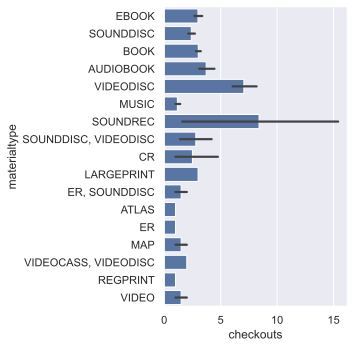

In [28]:
sns.catplot(data=df,
            x='checkouts',
            y='materialtype',
            kind='bar',
            errorbar='ci');

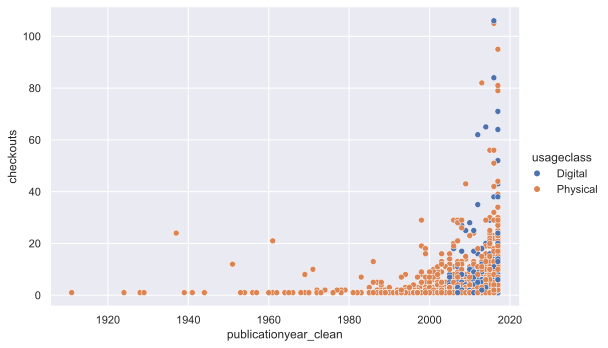

In [33]:
sns.relplot(data=df[df['publicationyear_clean'].isin(range(0, 2018))],
            x='publicationyear_clean',
            y='checkouts',
            hue='usageclass',
            aspect=1.5);

In [30]:
df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear,publicationyear_clean
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017,2017
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015],2015
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009,2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015,2015
5,Digital,OverDrive,EBOOK,2018,1,1,Little Dorrit,NaN,Charles Dickens,"Classic Literature, Fiction, Literature","Random House, Inc.",2012,2012


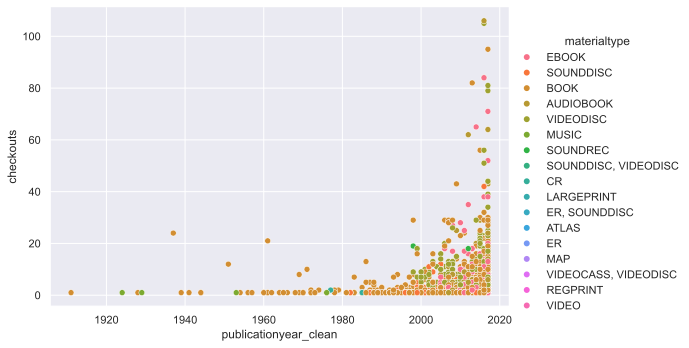

In [32]:
sns.relplot(data=df[df['publicationyear_clean'].isin(range(1500, 2018))],
            x='publicationyear_clean',
            y='checkouts',
            hue='materialtype',
            aspect=1.5);